In [1]:
import warnings
warnings.simplefilter(action='ignore')

In [2]:
import os
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)  # 过滤掉 Tensorflow 的 Warning 信息

import tensorflow.examples.tutorials.mnist.input_data as input_data
import numpy as np
import matplotlib.pyplot as plt

### 1. 下载并读取 MNIST 数据集

In [3]:
mnist = input_data.read_data_sets('data/', one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [4]:
print('train:', mnist.train.num_examples)
print('validation:', mnist.validation.num_examples)
print('test:', mnist.test.num_examples)

train: 55000
validation: 5000
test: 10000


### 2. 查看训练数据

#### 2.1 查看训练数据 images 与 labels 的 shape

In [5]:
print('train images shape:', mnist.train.images.shape)
print('train labels shape:', mnist.train.labels.shape)

train images shape: (55000, 784)
train labels shape: (55000, 10)


#### 2.2 查看第0项 images 图像的长度

In [6]:
print('train images[0] length:', len(mnist.train.images[0]))

train images[0] length: 784


#### 2.2 查看第0项 images 图像的内容

In [7]:
print(mnist.train.images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

#### 2.3 定义 plot_image 函数显示数字图像

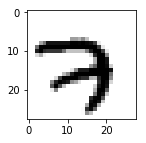

In [8]:
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image.reshape(28, 28), cmap='binary')
    plt.show()


plot_image(mnist.train.images[0])

#### 2.4 查看训练标签 labels 数据

In [9]:
print(mnist.train.labels[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


#### 2.5 使用 np.argmax 显示数字

In [10]:
print(np.argmax(mnist.train.labels[0]))

7


### 3. 查看多项数据 images 与 labels

#### 3.1 定义 plot_images_labels_prediction 函数以查看数字图形、真实的数字与预测结果

In [11]:
def plot_images_labels_prediction(images, labels, predictions, idx, num=10):
    """
    images: 数字图像数组
    labels: 真实值数组
    predictions: 预测结果数据
    idx: 开始显示的数据index
    num: 要显示的数据项数, 默认为10, 不超过25
    """
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[idx].reshape(28, 28), cmap='binary')
        title = 'lable=' + str(np.argmax(labels[idx]))
        if len(predictions) > 0:
            title += ',predict=' + str(predictions[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

#### 3.2 查看训练数据的前10项

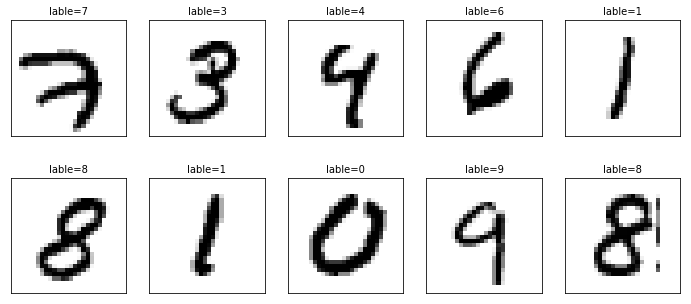

In [12]:
plot_images_labels_prediction(mnist.train.images, mnist.train.labels, [], 0, 10)

#### 3.3 查看验证数据的 shape

In [13]:
print('validation images shape:', mnist.validation.images.shape)
print('validation labels shape:', mnist.validation.labels.shape)

validation images shape: (5000, 784)
validation labels shape: (5000, 10)


#### 3.4 查看验证数据的前10项

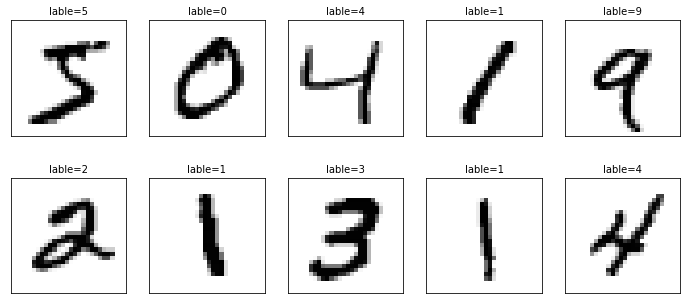

In [14]:
plot_images_labels_prediction(mnist.validation.images, mnist.validation.labels, [], 0, 10)

#### 3.5 查看测试数据的 shape

In [15]:
print('test images shape:', mnist.test.images.shape)
print('test labels shape:', mnist.test.labels.shape)

test images shape: (10000, 784)
test labels shape: (10000, 10)


#### 3.6 查看测试数据的前10项

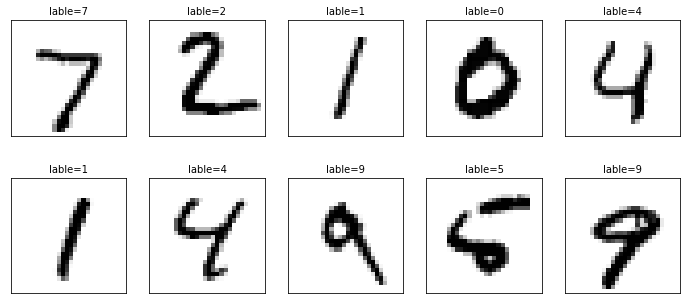

In [16]:
plot_images_labels_prediction(mnist.test.images, mnist.test.labels, [], 0, 10)

### 4. 批次读取 MNIST 数据

In [17]:
x_train_batch, y_train_batch = mnist.train.next_batch(batch_size=100)

In [18]:
print('x_train_batch length:', len(x_train_batch))
print('y_train_batch length:', len(y_train_batch))

x_train_batch length: 100
y_train_batch length: 100


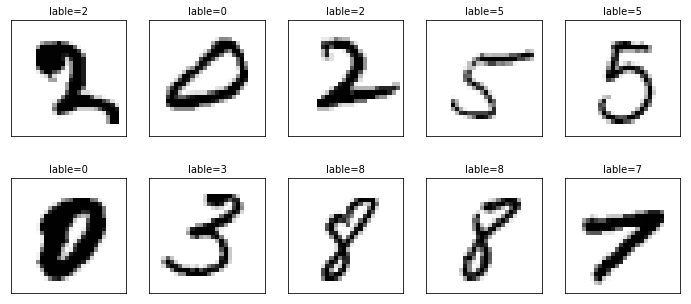

In [19]:
plot_images_labels_prediction(x_train_batch, y_train_batch, [], 0, 10)